In [ ]:
import numpy as np
import tensorflow as tf
from keras import layers
print(tf.__version__)
import matplotlib.pyplot as plt
from google.colab import drive
drive.mount('/content/drive')
!unzip '/content/drive/MyDrive/Dataset/ADEChallengeData2016'

Streaming output truncated to the last 5000 lines.
 extracting: ADEChallengeData2016/annotations/training/ADE_train_00019018.png  
  inflating: ADEChallengeData2016/annotations/training/ADE_train_00010086.png  
  inflating: ADEChallengeData2016/annotations/training/ADE_train_00002526.png  
  inflating: ADEChallengeData2016/annotations/training/ADE_train_00002954.png  
  inflating: ADEChallengeData2016/annotations/training/ADE_train_00007278.png  
  inflating: ADEChallengeData2016/annotations/training/ADE_train_00012415.png  
  inflating: ADEChallengeData2016/annotations/training/ADE_train_00012867.png  
  inflating: ADEChallengeData2016/annotations/training/ADE_train_00000612.png  
  inflating: ADEChallengeData2016/annotations/training/ADE_train_00016979.png  
  inflating: ADEChallengeData2016/annotations/training/ADE_train_00013255.png  
  inflating: ADEChallengeData2016/annotations/training/ADE_train_00013980.png  
  inflating: ADEChallengeData2016/annotations/training/ADE_train_0000

In [ ]:
import cv2
import os
from glob import glob


def load_and_preprocess_data(image_path, mask_path):


    print("Image Path:", image_path)
    print("Mask Path:", mask_path)

    # Load image
    image = tf.io.read_file(image_path)
    image = tf.image.decode_png(image, channels=3)
    image = tf.image.convert_image_dtype(image, tf.float32)
    image = tf.image.resize(image, (256, 256))

    # Load and preprocess mask (segmentation annotation)
    mask = tf.io.read_file(mask_path)
    mask = tf.image.decode_png(mask, channels=3)
    #mask = tf.cast(mask, tf.int32)
    #mask = tf.one_hot(mask, depth=150)
    mask = tf.math.reduce_max(mask, axis=-1, keepdims=True)
    mask = tf.image.resize(mask, (256, 256))

    return image, mask


def create_dataset(image_paths, mask_paths, batch_size=16):
    dataset = tf.data.Dataset.from_tensor_slices((image_paths, mask_paths))
    dataset = dataset.map(load_and_preprocess_data)
    dataset = dataset.batch(batch_size)
    dataset = dataset.prefetch(tf.data.AUTOTUNE)
    return dataset

training_image_paths = sorted(glob(os.path.join('/content/ADEChallengeData2016/images/training','*')))
training_mask_paths = sorted(glob(os.path.join('/content/ADEChallengeData2016/annotations/training','*')))

validation_image_paths = sorted(glob(os.path.join('/content/ADEChallengeData2016/images/validation','*')))
validation_mask_paths = sorted(glob(os.path.join('/content/ADEChallengeData2016/annotations/validation','*')))

# Create training and validation datasets
training_dataset = create_dataset(training_image_paths, training_mask_paths)
validation_dataset = create_dataset(validation_image_paths, validation_mask_paths)


Image Path: Tensor("args_0:0", shape=(), dtype=string)
Mask Path: Tensor("args_1:0", shape=(), dtype=string)
Image Path: Tensor("args_0:0", shape=(), dtype=string)
Mask Path: Tensor("args_1:0", shape=(), dtype=string)


In [ ]:
def SegNet_model(image_shape,number_of_classes):
  input=tf.keras.layers.Input(shape=image_shape)

  #Encoder
  E10=layers.Conv2D(filters=16,kernel_size=3,padding='same')(input)
  E11=layers.BatchNormalization()(E10)
  E12=layers.Activation('relu')(E11)
  E13=layers.Conv2D(filters=16,kernel_size=3,padding='same')(E12)
  E14=layers.BatchNormalization()(E13)
  E15=layers.Activation('relu')(E14)
  E16=layers.MaxPooling2D(pool_size=(2,2),strides=2)(E15)

  E20=layers.Conv2D(filters=32,kernel_size=(3,3),padding='same')(E16)
  E21=layers.BatchNormalization()(E20)
  E22=layers.Activation('relu')(E21)
  E23=layers.Conv2D(filters=32,kernel_size=(3,3),activation='relu',padding='same')(E22)
  E24=layers.BatchNormalization()(E23)
  E25=layers.Activation('relu')(E24)
  E26=layers.MaxPooling2D(pool_size=(2,2),strides=2)(E25)

  E30=layers.Conv2D(filters=64,kernel_size=(3,3),padding='same')(E26)
  E31=layers.BatchNormalization()(E30)
  E32=layers.Activation('relu')(E31)
  E33=layers.Conv2D(filters=64,kernel_size=(3,3),padding='same')(E32)
  E34=layers.BatchNormalization()(E33)
  E35=layers.Activation('relu')(E34)
  E36=layers.Conv2D(filters=64,kernel_size=(3,3),padding='same')(E35)
  E37=layers.BatchNormalization()(E36)
  E38=layers.Activation('relu')(E37)
  E39=layers.MaxPooling2D(pool_size=(2,2),strides=2)(E38)

  E40=layers.Conv2D(filters=128,kernel_size=(3,3),padding='same')(E39)
  E41=layers.BatchNormalization()(E40)
  E42=layers.Activation('relu')(E41)
  E43=layers.Conv2D(filters=128,kernel_size=(3,3),padding='same')(E42)
  E44=layers.BatchNormalization()(E43)
  E45=layers.Activation('relu')(E44)
  E46=layers.Conv2D(filters=128,kernel_size=(3,3),padding='same')(E45)
  E47=layers.BatchNormalization()(E46)
  E48=layers.Activation('relu')(E47)
  E49=layers.MaxPooling2D(pool_size=(2,2),strides=2)(E48)

  E50=layers.Conv2D(filters=256,kernel_size=(3,3),padding='same')(E49)
  E51=layers.BatchNormalization()(E50)
  E52=layers.Activation('relu')(E51)
  E53=layers.Conv2D(filters=256,kernel_size=(3,3),padding='same')(E52)
  E54=layers.BatchNormalization()(E53)
  E55=layers.Activation('relu')(E54)
  E56=layers.Conv2D(filters=256,kernel_size=(3,3),padding='same')(E55)
  E57=layers.BatchNormalization()(E56)
  E58=layers.Activation('relu')(E57)
  E59=layers.MaxPooling2D(pool_size=(2,2),strides=2)(E58)

  #Decoder
  D00=layers.UpSampling2D()(E59)
  D10=layers.Conv2D(filters=256,kernel_size=(3,3),padding='same')(D00)
  D11=layers.BatchNormalization()(D10)
  D12=layers.Activation('relu')(D11)
  D13=layers.Conv2D(filters=256,kernel_size=(3,3),padding='same')(D12)
  D14=layers.BatchNormalization()(D13)
  D15=layers.Activation('relu')(D14)
  D16=layers.Conv2D(filters=256,kernel_size=(3,3),padding='same')(D15)
  D17=layers.BatchNormalization()(D16)
  D18=layers.Activation('relu')(D17)

  D20=layers.UpSampling2D()(D18)
  D21=layers.Conv2D(filters=128,kernel_size=(3,3),padding='same')(D20)
  D22=layers.BatchNormalization()(D21)
  D23=layers.Activation('relu')(D22)
  D24=layers.Conv2D(filters=128,kernel_size=(3,3),padding='same')(D23)
  D25=layers.BatchNormalization()(D24)
  D26=layers.Activation('relu')(D25)
  D27=layers.Conv2D(filters=128,kernel_size=(3,3),padding='same')(D26)
  D28=layers.BatchNormalization()(D27)
  D29=layers.Activation('relu')(D28)

  D30=layers.UpSampling2D()(D29)
  D31=layers.Conv2D(filters=64,kernel_size=(3,3),padding='same')(D30)
  D32=layers.BatchNormalization()(D31)
  D33=layers.Activation('relu')(D32)
  D34=layers.Conv2D(filters=64,kernel_size=(3,3),padding='same')(D33)
  D35=layers.BatchNormalization()(D34)
  D36=layers.Activation('relu')(D35)
  D37=layers.Conv2D(filters=64,kernel_size=(3,3),padding='same')(D36)
  D38=layers.BatchNormalization()(D37)
  D39=layers.Activation('relu')(D38)

  D40=layers.UpSampling2D()(D39)
  D41=layers.Conv2D(filters=32,kernel_size=(3,3),padding='same')(D40)
  D42=layers.BatchNormalization()(D41)
  D43=layers.Activation('relu')(D42)
  D44=layers.Conv2D(filters=32,kernel_size=(3,3),padding='same')(D43)
  D45=layers.BatchNormalization()(D44)
  D46=layers.Activation('relu')(D45)

  D50=layers.UpSampling2D()(D46)
  D51=layers.Conv2D(filters=16,kernel_size=(3,3),padding='same')(D50)
  D52=layers.BatchNormalization()(D51)
  D53=layers.Activation('relu')(D52)
  D54=layers.Conv2D(filters=16,kernel_size=(3,3),padding='same')(D53)
  D55=layers.BatchNormalization()(D54)
  D56=layers.Activation('relu')(D55)

  output=layers.Conv2D(number_of_classes,kernel_size=(1,1),activation='softmax')(D56)

  model=tf.keras.Model(input,output)

  return model

In [ ]:
number_of_classes=151
image_shape=(256,256,3)
SegNet=SegNet_model(image_shape,number_of_classes)
print(SegNet.summary())


Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 256, 256, 3)]     0         
                                                                 
 conv2d (Conv2D)             (None, 256, 256, 16)      448       
                                                                 
 batch_normalization (Batch  (None, 256, 256, 16)      64        
 Normalization)                                                  
                                                                 
 activation (Activation)     (None, 256, 256, 16)      0         
                                                                 
 conv2d_1 (Conv2D)           (None, 256, 256, 16)      2320      
                                                                 
 batch_normalization_1 (Bat  (None, 256, 256, 16)      64        
 chNormalization)                                            

In [ ]:
optimizer = tf.keras.optimizers.Adam(learning_rate=0.001, clipvalue=1.0)
loss=tf.keras.losses.SparseCategoricalCrossentropy()
SegNet.compile(optimizer=optimizer, loss=loss, metrics=['accuracy'])
checkpoint_filepath='/content/drive/MyDrive/Dataset/SegNet_checkpoint.h5'
checkpoint_callback =tf.keras.callbacks.ModelCheckpoint(
    filepath=checkpoint_filepath,
    verbose=1,
    save_best_only=True)
Early_stop=tf.keras.callbacks.EarlyStopping(monitor='val_loss',restore_best_weights=False,patience=16)

call_backs=[checkpoint_callback,Early_stop]



In [ ]:
history=SegNet.fit(training_dataset,validation_data=validation_dataset,batch_size=16,epochs=10,callbacks=call_backs)


Epoch 1/10
1264/1264 [==============================] - ETA: 0s - loss: 3.2495 - accuracy: 0.2616
Epoch 1: val_loss improved from inf to 3.67818, saving model to /content/drive/MyDrive/Dataset/SegNet_checkpoint.h5


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


1264/1264 [==============================] - 496s 374ms/step - loss: 3.2495 - accuracy: 0.2616 - val_loss: 3.6782 - val_accuracy: 0.1808
Epoch 2/10
1264/1264 [==============================] - ETA: 0s - loss: 2.9894 - accuracy: 0.2773
Epoch 2: val_loss improved from 3.67818 to 3.14474, saving model to /content/drive/MyDrive/Dataset/SegNet_checkpoint.h5
1264/1264 [==============================] - 475s 376ms/step - loss: 2.9894 - accuracy: 0.2773 - val_loss: 3.1447 - val_accuracy: 0.2347
Epoch 3/10
1264/1264 [==============================] - ETA: 0s - loss: 2.9347 - accuracy: 0.2904
Epoch 3: val_loss improved from 3.14474 to 3.08197, saving model to /content/drive/MyDrive/Dataset/SegNet_checkpoint.h5
1264/1264 [==============================] - 475s 376ms/step - loss: 2.9347 - accuracy: 0.2904 - val_loss: 3.0820 - val_accuracy: 0.2541
Epoch 4/10
1264/1264 [==============================] - ETA: 0s - loss: 2.8912 - accuracy: 0.3023
Epoch 4: val_loss did not improve from 3.08197
1264/126

In [ ]:
SegNet.save('/content/drive/MyDrive/modelSegNetModel')

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
from keras.models import load_model
#model=load_model('/content/SegNet.h5')
model=load_model('/content/drive/MyDrive/Dataset/SegNet_checkpoint.h5')
SegNet.compile(optimizer=optimizer, loss=loss, metrics=['accuracy'])


In [ ]:
from keras.preprocessing import image
test_image = image.load_img('/content/drive/MyDrive/cat.jpeg')
test_image = tf.image.resize(test_image,(256,256))
test_image = image.img_to_array(test_image)
test_image = np.expand_dims(test_image, axis = 0)

#predict the result
result = SegNet.predict(test_image/255)

1/1 [==============================] - 0s 34ms/step


0
[0.11469214]


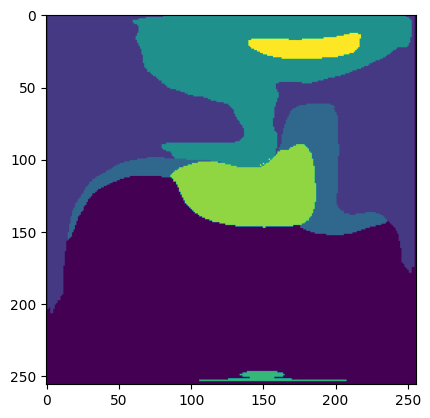

In [ ]:
segmentation_map=np.argmax(result[0,:,:,:],axis=-1)
plt.imshow(segmentation_map)
#plt.colorbar()
#plt.show()
print(np.argmax(result[0,0,0,:]))
print(result[0,0,0,3:4])

In [ ]:
from keras.preprocessing import image
test_image = image.load_img('/content/drive/MyDrive/cell1.jpg')
test_image = tf.image.resize(test_image,(256,256))
test_image = image.img_to_array(test_image)
test_image = np.expand_dims(test_image, axis = 0)

#predict the result
result = SegNet.predict(test_image/255)


1/1 [==============================] - 0s 22ms/step


0
0.4959414


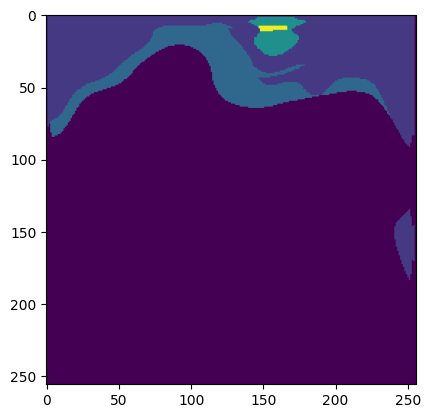

In [ ]:
segmentation_map=np.argmax(result[0,:,:,:],axis=-1)
plt.imshow(segmentation_map)
#plt.colorbar()
#plt.show()
print(np.argmax(result[0,0,0,:]))
print(result[0,0,0,0])